<a href="https://colab.research.google.com/github/Raphael-Blaize/Future-Contraceptive-Use/blob/main/Intelligent_Forecasting_Challenge_Model_Future_Contraceptive__Use_in_Cote_d'Ivoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intelligent Forecasting Challenge

## Defining The Question

### Specifying The Question

### Defining The Metric for Success

### Understanding The Context

### Recording The Experimental Design

### Data Relevance

## Reading The Data

## Checking The Data

## External Datasource Validation

## Tidying the datasets

## **DATA SECTION**

### **IMPORTING THE LIBRARIES WE NEED AND LOOKING THROUGH OUR DATASET TO UNDERSTAND IT BETTER**

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading our dataset
annual = pd.read_csv('contraceptive_case_data_annual.csv')
## reading the first 10 rows of our dataset
annual.head(10)

,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,2018,3298.0,965.0,2997.0,749.0,10892,2609,1867.0,425.0,117.0,15.0,26.0,823.0,3681.0,7082.0,6893.0,673.0,2435.0,8799.0,12890.0,35961.0,NaN,3167.0,NaN,16041.0,48097.0
1,ABENGOUROU,2017,2597.0,698.0,2125.0,588.0,9939,2480,1835.0,400.0,34.0,22.0,15.0,483.0,2894.0,6460.0,6339.0,544.0,1760.0,9920.0,12727.0,31260.0,NaN,2617.0,NaN,16403.0,41079.0
2,ABENGOUROU,2016,865.0,408.0,2616.0,786.0,8407,2440,2675.0,439.0,20.0,24.0,19.0,438.0,3167.0,5394.0,5982.0,436.0,1503.0,11407.0,12666.0,28256.0,NaN,1671.0,NaN,8561.0,20878.0
3,ABOBO EST,2018,4041.0,2234.0,2200.0,583.0,13504,3940,2959.0,673.0,383.0,180.0,155.0,2372.0,878.0,9512.0,5234.0,1154.0,3309.0,2241.0,9914.0,7426.0,NaN,3092.0,NaN,9359.0,9046.0
4,ABOBO EST,2017,1954.0,2491.0,1768.0,214.0,10745,2389,3506.0,679.0,147.0,259.0,258.0,3066.0,1805.0,8939.0,6957.0,2780.0,4009.0,5846.0,11784.0,13191.0,NaN,2596.0,NaN,6359.0,11711.0
5,ABOBO EST,2016,760.0,617.0,1989.0,348.0,8784,2008,3220.0,732.0,101.0,169.0,147.0,673.0,2056.0,12027.0,6919.0,2617.0,1124.0,4097.0,8381.0,15609.0,NaN,NaN,NaN,NaN,NaN
6,ABOBO OUEST,2018,1806.0,1568.0,8288.0,201.0,6586,1020,6923.0,326.0,803.0,142.0,908.0,1929.0,8318.0,5179.0,8922.0,3117.0,3269.0,28769.0,11085.0,46937.0,NaN,2591.0,NaN,9269.0,55790.0
7,ABOBO OUEST,2017,2518.0,1635.0,6797.0,870.0,13464,1764,9350.0,1369.0,2722.0,536.0,1090.0,2085.0,5025.0,8996.0,12141.0,3342.0,5271.0,27150.0,28394.0,35613.0,NaN,4330.0,NaN,21156.0,93546.0
8,ABOBO OUEST,2016,2435.0,1257.0,6623.0,626.0,9730,1324,9362.0,603.0,2497.0,889.0,1243.0,2427.0,7531.0,8520.0,13037.0,2934.0,9514.0,50103.0,42308.0,68118.0,NaN,2875.0,NaN,13670.0,28693.0
9,ABOISSO,2018,1810.0,675.0,933.0,260.0,6997,1791,1606.0,304.0,27.0,5.0,21.0,663.0,963.0,3657.0,6091.0,45.0,1626.0,1538.0,4211.0,5638.0,NaN,1921.0,NaN,3918.0,5336.0


In [ ]:
# Look at the bottom of the dataset
annual.tail(10)

,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
329,YOPOUGON-OUEST SONGON,2016,1050.0,1246.0,10349.0,2763.0,12565,3155,11306.0,2710.0,291.0,302.0,472.0,1716.0,12131.0,10773.0,41965.0,2072.0,10972.0,64521.0,57901.0,105333.0,NaN,NaN,NaN,NaN,NaN
330,ZOUAN-HOUNIEN,2018,1670.0,478.0,502.0,193.0,4022,1329,440.0,120.0,107.0,11.0,25.0,382.0,424.0,2731.0,262.0,49.0,724.0,701.0,3927.0,358.0,NaN,754.0,NaN,2603.0,458.0
331,ZOUAN-HOUNIEN,2017,1822.0,474.0,173.0,148.0,3652,959,607.0,112.0,7.0,5.0,17.0,442.0,258.0,2365.0,211.0,13.0,785.0,480.0,3591.0,468.0,NaN,541.0,NaN,1379.0,379.0
332,ZOUAN-HOUNIEN,2016,1409.0,389.0,174.0,135.0,2658,672,599.0,76.0,NaN,1.0,1.0,307.0,299.0,1451.0,458.0,4.0,618.0,445.0,2012.0,1133.0,NaN,NaN,NaN,9.0,NaN
333,ZOUKOUGBEU,2018,38.0,333.0,211.0,72.0,876,548,48.0,24.0,8.0,37.0,36.0,323.0,289.0,1455.0,391.0,46.0,631.0,520.0,1459.0,1006.0,NaN,999.0,NaN,1512.0,1459.0
334,ZOUKOUGBEU,2017,12.0,161.0,197.0,54.0,668,433,124.0,17.0,NaN,NaN,4.0,129.0,351.0,1176.0,309.0,NaN,203.0,731.0,1471.0,713.0,NaN,324.0,NaN,4087.0,1122.0
335,ZOUKOUGBEU,2016,21.0,253.0,107.0,74.0,820,484,31.0,23.0,NaN,NaN,NaN,138.0,300.0,858.0,494.0,NaN,261.0,902.0,1825.0,935.0,NaN,70.0,NaN,998.0,204.0
336,ZUENOULA,2018,176.0,1441.0,424.0,145.0,3368,1826,638.0,396.0,2.0,5.0,3.0,1133.0,491.0,4197.0,2044.0,38.0,1550.0,774.0,4188.0,7006.0,NaN,1560.0,NaN,2069.0,5471.0
337,ZUENOULA,2017,231.0,591.0,502.0,154.0,3677,1611,585.0,505.0,31.0,4.0,4.0,488.0,551.0,3925.0,2703.0,7.0,813.0,1342.0,4377.0,6177.0,NaN,977.0,NaN,2251.0,4270.0
338,ZUENOULA,2016,126.0,270.0,894.0,271.0,4236,1644,1982.0,1746.0,11.0,11.0,9.0,202.0,892.0,3145.0,7902.0,49.0,288.0,2020.0,3544.0,13444.0,NaN,81.0,NaN,770.0,2993.0


In [ ]:
# Check the records we have 
annual.shape

(339, 27)

##### ANNUAL DATASET PREPROCESSING SECTION

In [ ]:
# checking the info on our ranking dataset 
annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   district                     339 non-null    object 
 1   year                         339 non-null    int64  
 2   implant_women_old            326 non-null    float64
 3   implant_women_new            337 non-null    float64
 4   injection2_women_old         337 non-null    float64
 5   injection2_women_new         334 non-null    float64
 6   injection3_women_old         339 non-null    int64  
 7   injection3_women_new         339 non-null    int64  
 8   pill_women_old               339 non-null    float64
 9   pill_women_new               338 non-null    float64
 10  iud_women_old                212 non-null    float64
 11  iud_women_new                277 non-null    float64
 12  iud_number_dispensed         233 non-null    float64
 13  implant_number_dispe

WE HAVE 678 ENTRIES AND 27 COLUMNS

In [ ]:
# Looking at the columns in hospital dataset
annual.columns

Index(['district', 'year', 'implant_women_old', 'implant_women_new',
       'injection2_women_old', 'injection2_women_new', 'injection3_women_old',
       'injection3_women_new', 'pill_women_old', 'pill_women_new',
       'iud_women_old', 'iud_women_new', 'iud_number_dispensed',
       'implant_number_dispensed', 'injection2_number_dispensed',
       'injection3_number_dispensed', 'pill_number_dispensed',
       'iud_number_received', 'implant_number_received',
       'injection2_number_received', 'injection3_number_received',
       'pill_number_received', 'iud_stock_end', 'implant_stock_end',
       'injection2_stock_end', 'injection3_stock_end', 'pill_stock_end'],
      dtype='object')

#### **CHECKING THE UNIQUE VALUES IN THE DATASET**

In [ ]:
#cheking the unique values in the column names 

#for loop to iterate through each column
for column in annual.columns:
  # creating a variable columnc which will be the the content in each column
  columnc = annual[column]
  #Printing the column name
  print(column)
  #printing the unique values in the column
  print(columnc.unique())
  # printing the number of unique values in the column
  print(columnc.nunique())
  print("\n")

district
['ABENGOUROU' 'ABOBO EST' 'ABOBO OUEST' 'ABOISSO' 'ADIAKE'
 'ADJAME-PLATEAU-ATTECOUBE' 'ADZOPE' 'AGBOVILLE' 'AGNIBILEKROU' 'AKOUPE'
 'ALEPE' 'ANYAMA' 'ARRAH' 'BANGOLO' 'BEOUMI' 'BETTIE' 'BIANKOUMA'
 'BLOLEQUIN' 'BOCANDA' 'BONDOUKOU' 'BONGOUANOU' 'BOTRO' 'BOUAFLE'
 'BOUAKE NORD-EST' 'BOUAKE NORD-OUEST' 'BOUAKE-SUD' 'BOUNA' 'BOUNDIALI'
 'BUYO' 'COCODY - BINGERVILLE' 'DABAKALA' 'DABOU' 'DALOA' 'DANANE'
 'DAOUKRO' 'DIANRA' 'DIDIEVI' 'DIKODOUGOU' 'DIMBOKRO' 'DIVO' 'DOROPO'
 'DUEKOUE' 'FERKESSEDOUGOU' 'FRESCO' 'GAGNOA 1' 'GAGNOA 2' 'GRAND-BASSAM'
 'GRAND-LAHOU' 'GUEYO' 'GUIGLO' 'GUITRY' 'ISSIA' 'JACQUEVILLE' 'KANI'
 'KANIASSO' 'KATIOLA' 'KONG' 'KORHOGO 1' 'KORHOGO 2' 'KORO'
 'KOUASSI KOUASSIKRO' 'KOUIBLY' 'KOUMASSI' 'KOUN-FAO' 'KOUNAHIRI' 'KOUTO'
 'LAKOTA' "M'BATTO" "M'BENGUE" 'MADINANI' 'MAN' 'MANKONO' 'MBAHIAKRO'
 'MEAGUI' 'MINIGNAN' 'NASSIAN' 'NIAKARAMADOUGOU' 'ODIENNE'
 'OUANGOLODOUGOU' 'OUANINOU' 'OUME' 'PORT-BOUET-VRIDI' 'PRIKRO' 'SAKASSOU'
 'SAN-PEDRO' 'SANDEGUE' 'SASSANDRA' 

In [ ]:
# Summary of the numerical attributes
annual.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,339.0,2017.000000,0.817704,2016.0,2016.00,2017.0,2018.00,2018.0
implant_women_old,326.0,1499.193252,2975.216904,1.0,90.75,459.0,1430.00,23226.0
implant_women_new,337.0,572.875371,633.746985,5.0,146.00,350.0,749.00,3959.0
injection2_women_old,337.0,1097.528190,1641.024406,2.0,132.00,498.0,1295.00,10349.0
injection2_women_new,334.0,243.158683,398.174681,1.0,60.00,145.0,293.75,4535.0
injection3_women_old,339.0,5657.554572,25958.064589,144.0,1612.50,2828.0,5433.00,475882.0
injection3_women_new,339.0,1065.843658,809.122417,65.0,460.00,879.0,1456.00,5164.0
pill_women_old,339.0,1206.662832,1774.006091,1.0,154.00,490.0,1502.00,12508.0
pill_women_new,338.0,269.105621,615.979742,1.0,60.50,141.0,311.25,8376.0
iud_women_old,212.0,138.396226,367.104029,1.0,12.00,37.5,130.00,3482.0


#### **ENSURING THE DATASET CONTAIN NO DUPLICATE VALUES**


In [ ]:
# Check for the consistency in our data
annual.duplicated().sum()

0

#### **TAKING CARE OF MISSING VALUES**

In [ ]:
#cheking for null values 
annual.isnull().sum()

district                         0
year                             0
implant_women_old               13
implant_women_new                2
injection2_women_old             2
injection2_women_new             5
injection3_women_old             0
injection3_women_new             0
pill_women_old                   0
pill_women_new                   1
iud_women_old                  127
iud_women_new                   62
iud_number_dispensed           106
implant_number_dispensed         6
injection2_number_dispensed      8
injection3_number_dispensed      1
pill_number_dispensed            5
iud_number_received             94
implant_number_received          6
injection2_number_received      11
injection3_number_received       2
pill_number_received             7
iud_stock_end                  339
implant_stock_end               73
injection2_stock_end           339
injection3_stock_end            68
pill_stock_end                  73
dtype: int64

In [ ]:
#Calaculating the percentage of missing values and the visualising it 
# Count the missing values
missing_count = annual.isnull().sum() 
#the count of all values
value_count = annual.isnull().count() 
#the percetage of missing values
missing_percentage = round(missing_count / value_count * 100,2) 
#Cretaing a dataframe
missing_df = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage}) 
print(missing_df)

                             count  percentage
district                         0        0.00
year                             0        0.00
implant_women_old               13        3.83
implant_women_new                2        0.59
injection2_women_old             2        0.59
injection2_women_new             5        1.47
injection3_women_old             0        0.00
injection3_women_new             0        0.00
pill_women_old                   0        0.00
pill_women_new                   1        0.29
iud_women_old                  127       37.46
iud_women_new                   62       18.29
iud_number_dispensed           106       31.27
implant_number_dispensed         6        1.77
injection2_number_dispensed      8        2.36
injection3_number_dispensed      1        0.29
pill_number_dispensed            5        1.47
iud_number_received             94       27.73
implant_number_received          6        1.77
injection2_number_received      11        3.24
injection3_nu

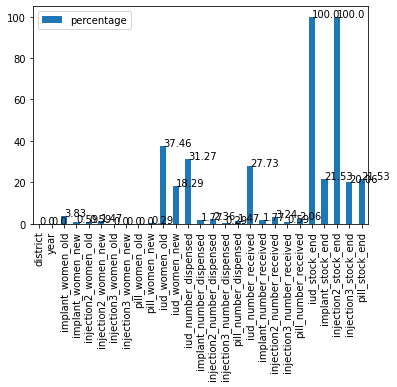

In [ ]:
#Visualising our missing values 
barchart = missing_df.plot.bar(y = "percentage")

# For loop is a handy way to add labels to the bars
for index, percentage in enumerate(missing_percentage):
  barchart.text(index, percentage, str(percentage))

In [ ]:
#Dropping the iud_stock_end and injection2_stock_end
annual.drop(columns = ["iud_stock_end", "injection2_stock_end"], inplace = True)

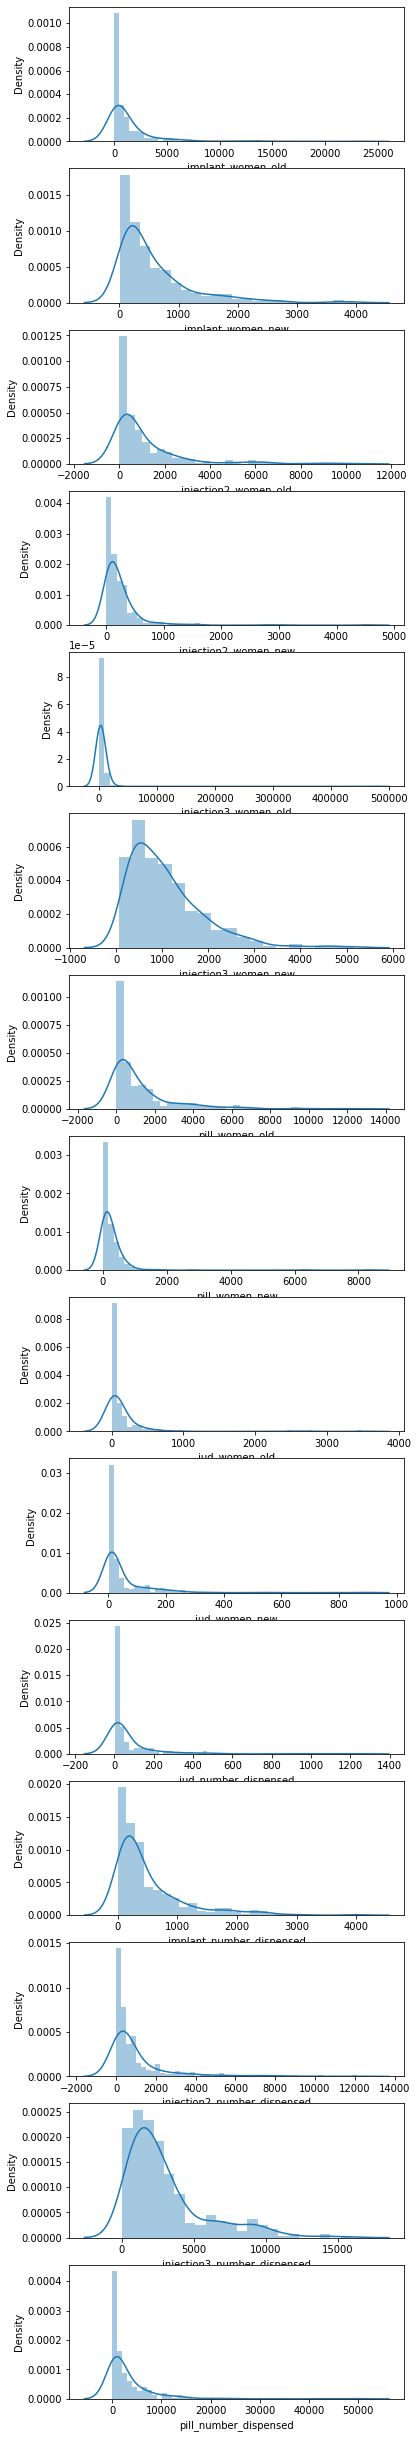

In [ ]:
import seaborn as sns
cols = ['implant_women_old', 'implant_women_new',
       'injection2_women_old', 'injection2_women_new', 'injection3_women_old',
       'injection3_women_new', 'pill_women_old', 'pill_women_new',
       'iud_women_old', 'iud_women_new', 'iud_number_dispensed',
       'implant_number_dispensed', 'injection2_number_dispensed',
       'injection3_number_dispensed', 'pill_number_dispensed']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.distplot(annual[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)

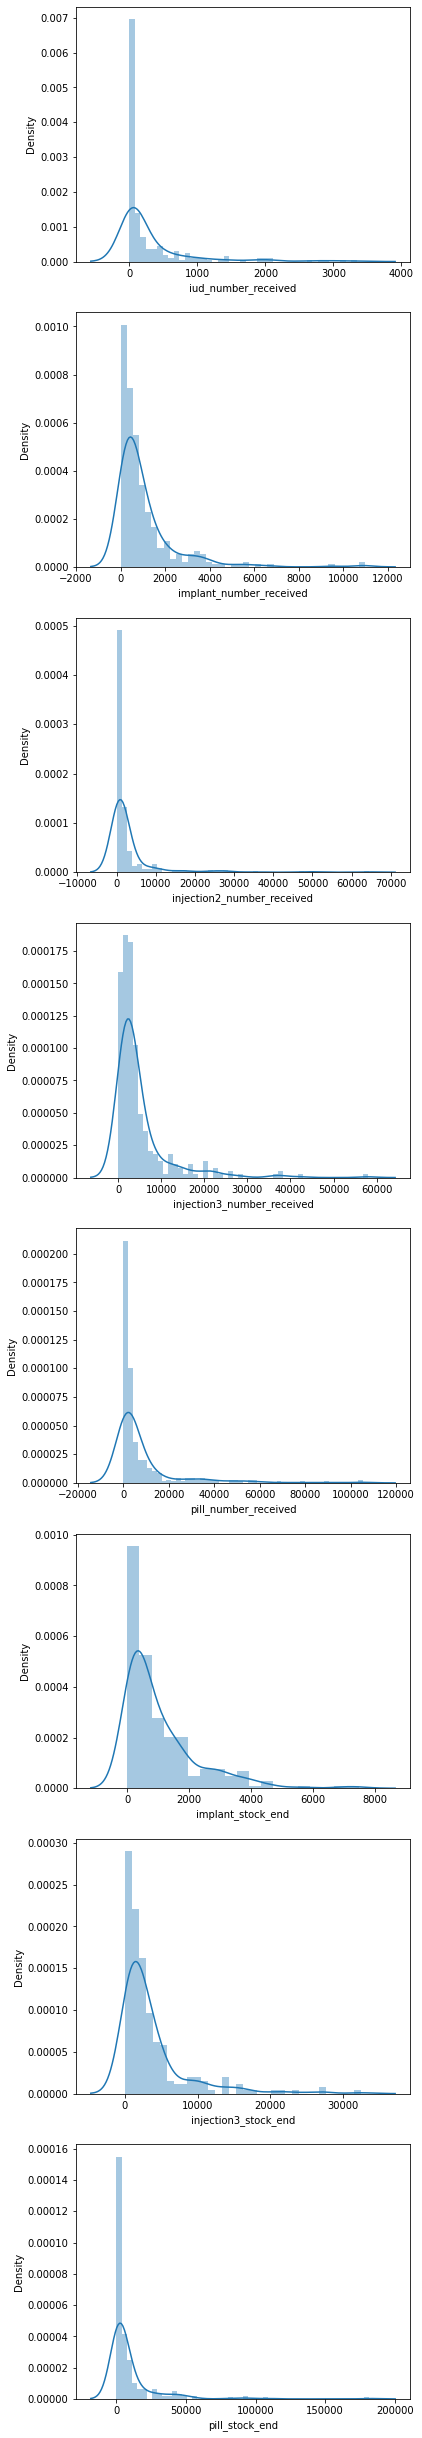

In [ ]:
import seaborn as sns
cols = [ 'iud_number_received', 'implant_number_received',
       'injection2_number_received', 'injection3_number_received',
       'pill_number_received', 'implant_stock_end','injection3_stock_end', 'pill_stock_end']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.distplot(annual[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)

#### **CHECKING AND TAKING CARE OF ANY OUTLIERS IN OUR DATASET**

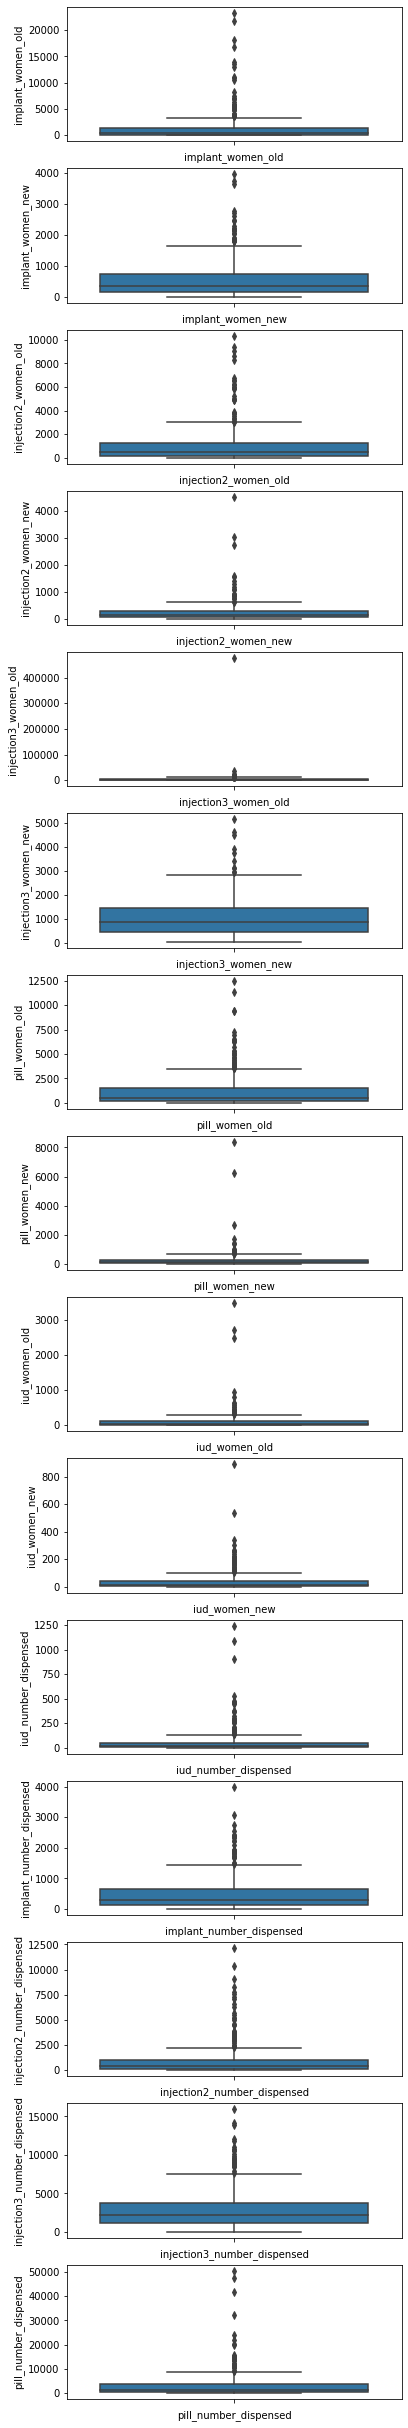

In [ ]:
# Checking for outliers for numeric variables
import seaborn as sns
cols = ['implant_women_old', 'implant_women_new',
       'injection2_women_old', 'injection2_women_new', 'injection3_women_old',
       'injection3_women_new', 'pill_women_old', 'pill_women_new',
       'iud_women_old', 'iud_women_new', 'iud_number_dispensed',
       'implant_number_dispensed', 'injection2_number_dispensed',
       'injection3_number_dispensed', 'pill_number_dispensed',]

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.boxplot(y=annual[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)

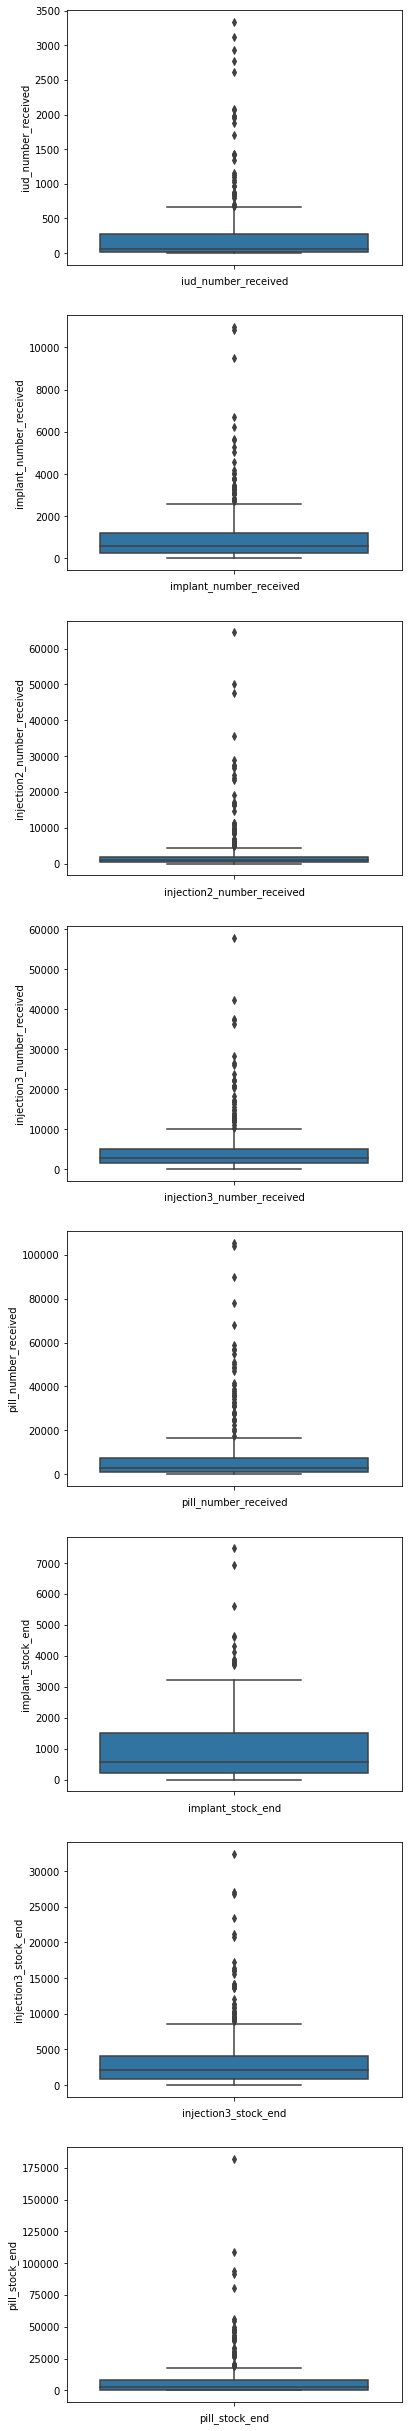

In [ ]:
# Checking for outliers for numeric variables
import seaborn as sns
cols = ['iud_number_received', 'implant_number_received',
       'injection2_number_received', 'injection3_number_received',
       'pill_number_received', 'implant_stock_end','injection3_stock_end', 'pill_stock_end']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.boxplot(y=annual[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)

In [ ]:
# Using the IQR formula
Q1 = annual.quantile(0.25)
Q3 = annual.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
#cheking the shape of our dataset before dropping the outliers
annual.shape

In [ ]:
#dropping the outliers in the columns of our dataset
df1 = annual[~((annual < (Q1 - 1.5 * IQR)) |(annual > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

The Number of outliers after dropping is quite significant so we won't drop the outliers because we may lose valuable information, we will consider log transformation instead for this case of our dataset

In [ ]:
#Exporting to csv
annual.to_csv("Contraceptive_case_data_annual_cleaned.csv")